***
# Iris Flower Classification
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Data Preprocessing 

In [4]:
# delete Id column

df = df.drop(columns = ["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 2. Exploratory Data Analysis (EDA)

<AxesSubplot: >

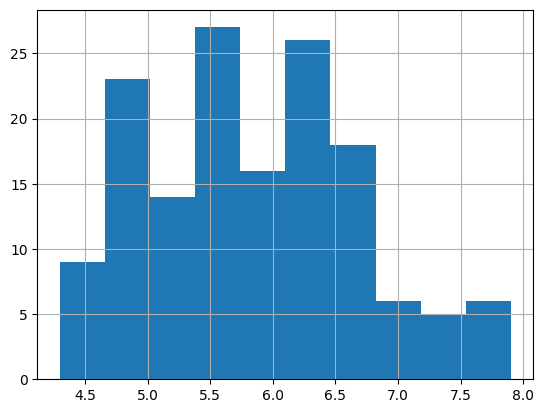

In [9]:
df["SepalLengthCm"].hist()

<AxesSubplot: >

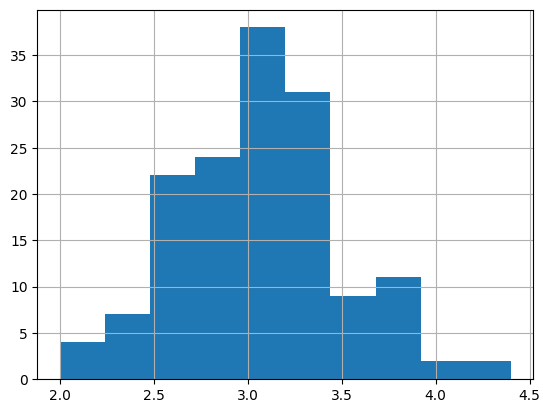

In [10]:
df["SepalWidthCm"].hist()

<AxesSubplot: >

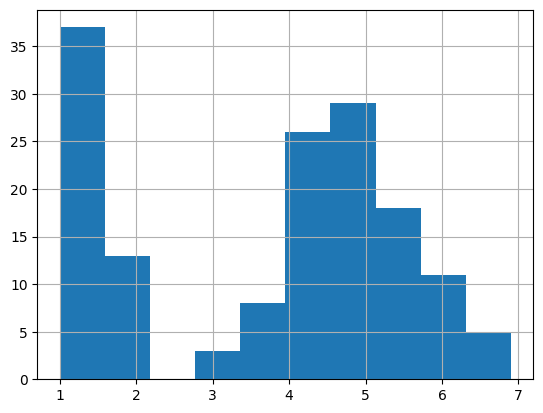

In [11]:
df["PetalLengthCm"].hist()

<AxesSubplot: >

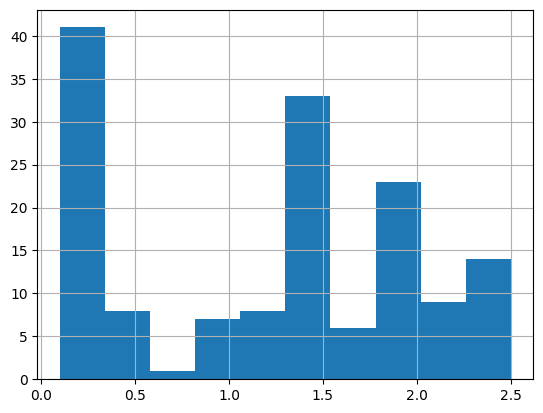

In [12]:
df["PetalWidthCm"].hist()

In [13]:
colours = ["green", "red", "blue"]
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

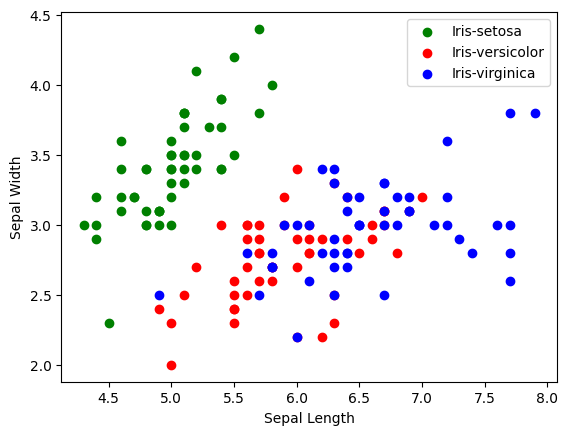

In [14]:
for i in range(3):
    X = df[df["Species"] == species[i]]
    plt.scatter(X["SepalLengthCm"], X["SepalWidthCm"], c=colours[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

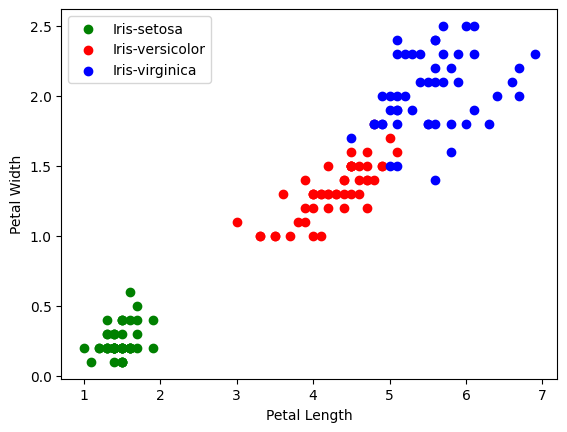

In [15]:
for i in range(3):
    X = df[df["Species"] == species[i]]
    plt.scatter(X["PetalLengthCm"], X["PetalWidthCm"], c=colours[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

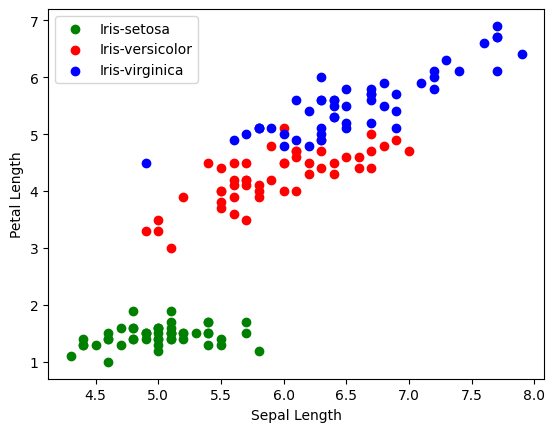

In [16]:
for i in range(3):
    X = df[df["Species"] == species[i]]
    plt.scatter(X["SepalLengthCm"], X["PetalLengthCm"], c=colours[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

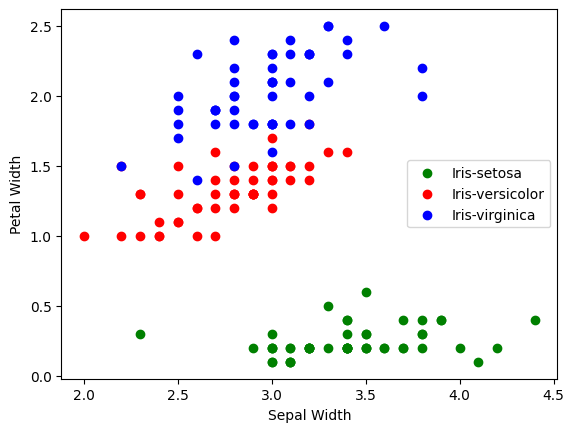

In [17]:
for i in range(3):
    X = df[df["Species"] == species[i]]
    plt.scatter(X["SepalWidthCm"], X["PetalWidthCm"], c=colours[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [18]:
# label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df["Species"] = le.fit_transform(df["Species"])
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
50,7.0,3.2,4.7,1.4,1
35,5.0,3.2,1.2,0.2,0
110,6.5,3.2,5.1,2.0,2
13,4.3,3.0,1.1,0.1,0


## 3. Model Building

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Species"])
Y = df["Species"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
# using LogisticRegression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print("Accuracy Score :- ", lr.score(X_test, Y_test)*100)

Accuracy Score :-  96.66666666666667


In [22]:
# using KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
print("Accuracy Score :- ", knn.score(X_test, Y_test)*100)

Accuracy Score :-  100.0


In [23]:
# using decision tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
print("Accuracy Score :- ", dt.score(X_test, Y_test)*100)

Accuracy Score :-  93.33333333333333


In [24]:
def func(prediction):
    if prediction==0:
        print("Predicted Value is :- Iris-setosa")
    elif prediction==1:
        print("Predicted Value is :- Iris-versicolor")
    else:
        print("Predicted Value is :- Iris-virginica")

In [25]:
X_New1 = np.array([[6, 2.9, 4, 2.2]])
p_value_1 = knn.predict(X_New1)

C:\Python 3.10\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
# model predict the iris species:

func(p_value_1)

Predicted Value is :- Iris-versicolor
